In [138]:
# Import Libaries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configurations of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Mat\Downloads/movies.csv')

In [139]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00


In [140]:
# Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
releasedcountry - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [141]:
# Datat types for columns

df.dtypes

name                object
rating              object
genre               object
year                 int64
released            object
releasedcountry     object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

In [142]:
#Changing data type (note that "int64" will not allow NA values, you must use "Int64" to change data to int AND allow na values)

df[ 'budget' ] = df[ 'budget' ].astype('Int64')
df[ 'gross' ] = df[ 'gross' ].astype('Int64')

#or you can fill in NA with 0 which works too
df["budget"] = df["budget"].fillna(0)
df["gross"] = df["gross"].fillna(0)


In [144]:
df.head()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00


In [146]:
# Create correct year Column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,United States,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


In [147]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [148]:
pd.set_option('display.max_rows', None)


In [163]:
# Remove duplicates
#df["company"].drop_duplicates().sort_values(ascending=False)

# to acctually drop Duplicates -> df.drop_duplicates()

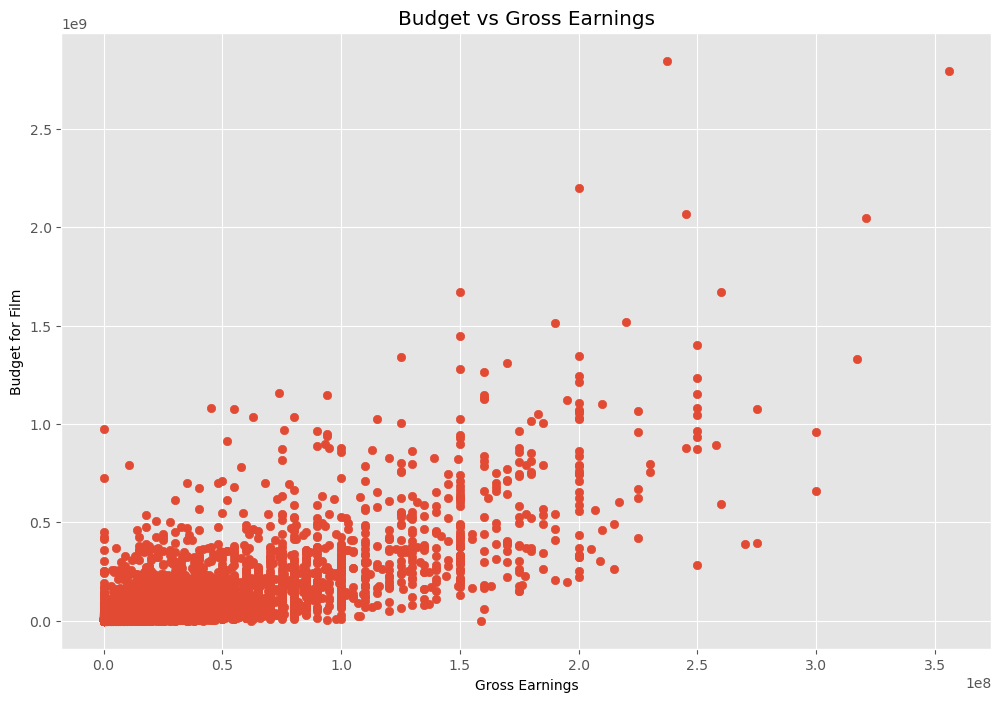

In [150]:
# Budget vs Gross Scatter Plot


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [152]:
df.head()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,United States,7.80,"1,100,000.00",James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,United States,8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,United States,7.80,"1,100,000.00",James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,United States,7.80,"876,000.00",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,United States,8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018


In [164]:
# Plot budget vs gross using seaborn

#sns.regplot(x='budget' , y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"blue"})

In [107]:
# Looking at correlation

In [154]:
pd.set_option("display.precision", 8)
df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\Mat\AppData\Local\Temp\ipykernel_12968\3108497647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.31,0.26,0.12
score,0.10,1.00,0.41,0.06,0.19,0.40
votes,0.22,0.41,1.00,0.49,0.63,0.31
budget,0.31,0.06,0.49,1.00,0.75,0.27
gross,0.26,0.19,0.63,0.75,1.00,0.25
runtime,0.12,0.40,0.31,0.27,0.25,1.00


C:\Users\Mat\AppData\Local\Temp\ipykernel_12968\2708932002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


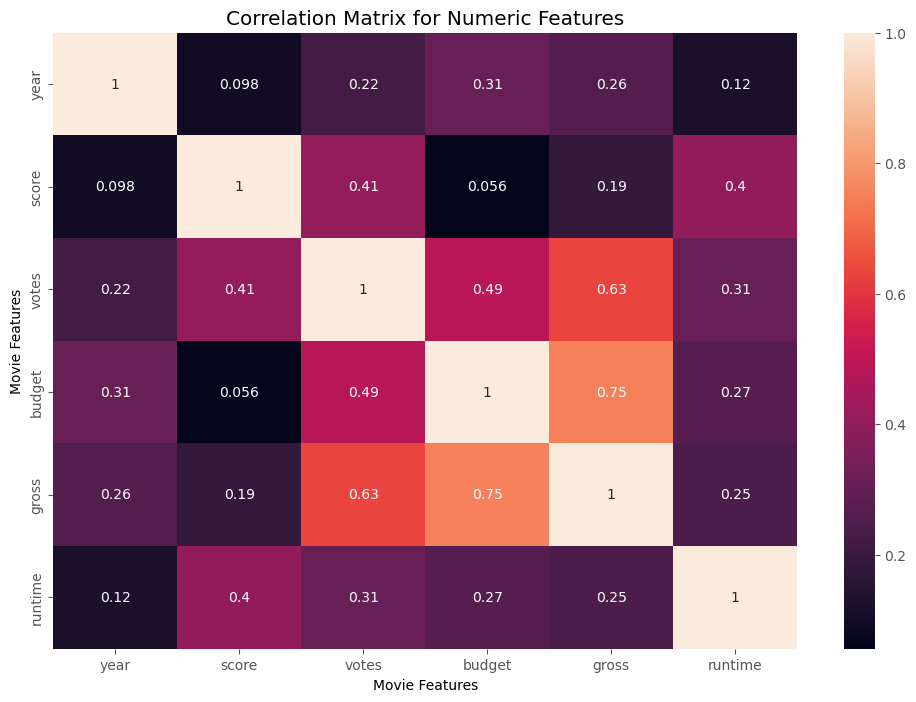

In [155]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [156]:
# Looking at Company

df.head()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,United States,7.80,"1,100,000.00",James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,United States,8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,United States,7.80,"1,100,000.00",James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,United States,7.80,"876,000.00",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,United States,8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018


In [165]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2107,56,7.80,"1,100,000.00",1155,1778,2334,55,237000000,2847246203,2253,162.00,30
7445,535,5,0,2019,2865,56,8.40,"903,000.00",162,743,2241,55,356000000,2797501328,1606,181.00,40
3045,6896,5,6,1997,1224,56,7.80,"1,100,000.00",1155,1778,1595,55,200000000,2201647264,2253,194.00,18
6663,5144,5,0,2015,2609,56,7.80,"876,000.00",1125,2550,524,55,245000000,2069521700,1540,138.00,36
7244,536,5,0,2018,2780,56,8.40,"897,000.00",162,743,2241,55,321000000,2048359754,1606,149.00,39


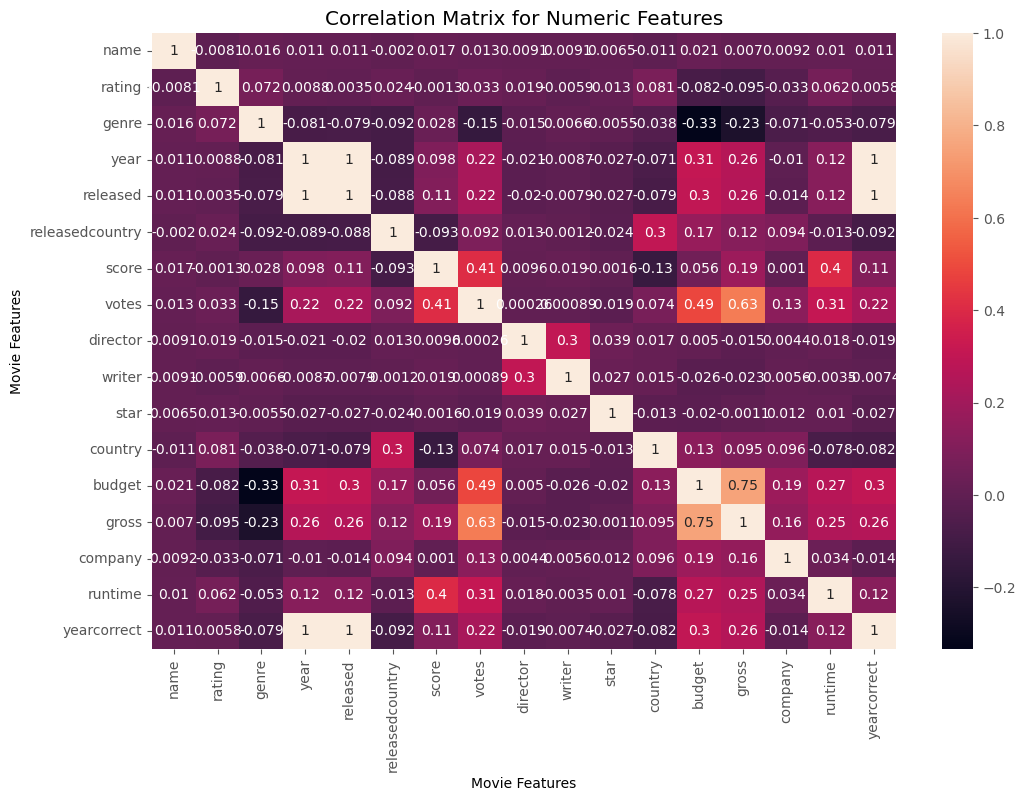

In [158]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [159]:
df_numerized.corr()

,name,rating,genre,year,released,releasedcountry,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.00,-0.01,0.02,0.01,0.01,-0.00,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.01,0.00,0.02,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.08,-0.10,-0.03,0.06,0.01
genre,0.02,0.07,1.00,-0.08,-0.08,-0.09,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.33,-0.23,-0.07,-0.05,-0.08
year,0.01,0.01,-0.08,1.00,1.00,-0.09,0.10,0.22,-0.02,-0.01,-0.03,-0.07,0.31,0.26,-0.01,0.12,1.00
released,0.01,0.00,-0.08,1.00,1.00,-0.09,0.11,0.22,-0.02,-0.01,-0.03,-0.08,0.30,0.26,-0.01,0.12,1.00
releasedcountry,-0.00,0.02,-0.09,-0.09,-0.09,1.00,-0.09,0.09,0.01,-0.00,-0.02,0.30,0.17,0.12,0.09,-0.01,-0.09
score,0.02,-0.00,0.03,0.10,0.11,-0.09,1.00,0.41,0.01,0.02,-0.00,-0.13,0.06,0.19,0.00,0.40,0.11
votes,0.01,0.03,-0.15,0.22,0.22,0.09,0.41,1.00,0.00,0.00,-0.02,0.07,0.49,0.63,0.13,0.31,0.22
director,0.01,0.02,-0.02,-0.02,-0.02,0.01,0.01,0.00,1.00,0.30,0.04,0.02,0.00,-0.01,0.00,0.02,-0.02
writer,0.01,-0.01,0.01,-0.01,-0.01,-0.00,0.02,0.00,0.30,1.00,0.03,0.02,-0.03,-0.02,0.01,-0.00,-0.01


In [160]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name             name               1.00
                 rating            -0.01
                 genre              0.02
                 year               0.01
                 released           0.01
                 releasedcountry   -0.00
                 score              0.02
                 votes              0.01
                 director           0.01
                 writer             0.01
                 star               0.01
                 country           -0.01
                 budget             0.02
                 gross              0.01
                 company            0.01
                 runtime            0.01
                 yearcorrect        0.01
rating           name              -0.01
                 rating             1.00
                 genre              0.07
                 year               0.01
                 released           0.00
                 releasedcountry    0.02
                 score             -0.00
                

In [161]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs


budget           genre             -0.33
genre            budget            -0.33
                 gross             -0.23
gross            genre             -0.23
genre            votes             -0.15
votes            genre             -0.15
country          score             -0.13
score            country           -0.13
rating           gross             -0.10
gross            rating            -0.10
score            releasedcountry   -0.09
releasedcountry  score             -0.09
yearcorrect      releasedcountry   -0.09
releasedcountry  yearcorrect       -0.09
                 genre             -0.09
genre            releasedcountry   -0.09
releasedcountry  year              -0.09
year             releasedcountry   -0.09
releasedcountry  released          -0.09
released         releasedcountry   -0.09
country          yearcorrect       -0.08
yearcorrect      country           -0.08
budget           rating            -0.08
rating           budget            -0.08
genre           

In [162]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross            votes             0.63
votes            gross             0.63
gross            budget            0.75
budget           gross             0.75
released         year              1.00
year             released          1.00
yearcorrect      year              1.00
year             yearcorrect       1.00
yearcorrect      released          1.00
released         yearcorrect       1.00
name             name              1.00
director         director          1.00
company          company           1.00
gross            gross             1.00
budget           budget            1.00
country          country           1.00
star             star              1.00
writer           writer            1.00
votes            votes             1.00
score            score             1.00
releasedcountry  releasedcountry   1.00
released         released          1.00
year             year              1.00
genre            genre             1.00
rating           rating            1.00
